# Deloitte Quantum Climate Challenge 2023

In [3]:
!pip install qiskit==0.43.1


[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("./")

!pip install optuna

from matplotlib import pyplot as plt
%matplotlib inline

import quantux_libraries
from quantux_libraries import *

  Using cached optuna-3.2.0-py3-none-any.whl (390 kB)
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)

[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## Optuna hyperparameter optimization
### Select the comparison between ansatz circuits. The following compares ansatzes EfficientSU2,TwoLocal,PauliTwoDesign,RealAmplitudes,ExcitationPreserving.
### The comparison uses Fe2_CO2 as default for Optuna

[I 2023-06-21 08:22:27,884] A new study created in memory with name: no-name-19195675-d071-4f9b-a7a8-e50ab8c3ae8e


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 1 ExcitationPreserving


  0%|          | 0/50 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)
100%|██████████| 50/50 [10:13<00:00, 12.27s/it]
[I 2023-06-21 08:32:44,419] Trial 0 finished with value: -1421.6111330987665 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 1, 'initial_circuit': 'ExcitationPreserving'}. Best is trial 0 with value: -1421.6111330987665.


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 1 EfficientSU2


100%|██████████| 50/50 [09:41<00:00, 11.64s/it]
[I 2023-06-21 08:42:29,001] Trial 1 finished with value: -1421.9133764015987 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 1, 'initial_circuit': 'EfficientSU2'}. Best is trial 1 with value: -1421.9133764015987.


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 1 ExcitationPreserving


100%|██████████| 50/50 [09:51<00:00, 11.83s/it]
[I 2023-06-21 08:52:23,253] Trial 2 finished with value: -1421.6111331003394 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 1, 'initial_circuit': 'ExcitationPreserving'}. Best is trial 1 with value: -1421.9133764015987.


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 1 RealAmplitudes


100%|██████████| 50/50 [08:38<00:00, 10.36s/it]
[I 2023-06-21 09:01:04,170] Trial 3 finished with value: -1422.3674490655787 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 1, 'initial_circuit': 'RealAmplitudes'}. Best is trial 3 with value: -1422.3674490655787.


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 1 PauliTwoDesign


100%|██████████| 50/50 [08:44<00:00, 10.49s/it]
[I 2023-06-21 09:09:51,605] Trial 4 finished with value: -1421.6855071219534 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 1, 'initial_circuit': 'PauliTwoDesign'}. Best is trial 3 with value: -1422.3674490655787.


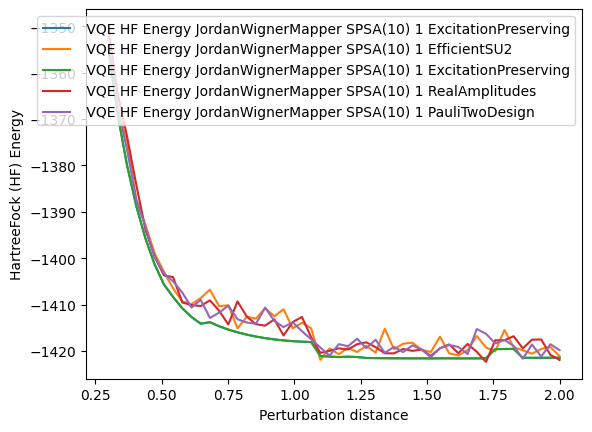

None

In [5]:
quantux_libraries.optuna_steps = []
quantux_libraries.optuna_energies = []
quantux_libraries.optuna_labels = []

study = optuna.create_study(pruner=optuna.pruners.PatientPruner(None, patience=9), direction='minimize')
early_stopping = EarlyStoppingCallback(early_stopping_rounds=10, direction='minimize')

quantux_libraries.dict_search_space = {
    'lst_mapper': ['JordanWignerMapper'],
    'optimizer': ['SPSA'],
    'min_reps': 1, 'max_reps': 1,
    'lst_initial_circuit': ['EfficientSU2', 'TwoLocal', 'PauliTwoDesign', 'RealAmplitudes', 'ExcitationPreserving'],
}

study.optimize(objective, n_trials=5, callbacks=[early_stopping], timeout=3600)

for i, step in enumerate(quantux_libraries.optuna_steps):
    plt.plot(step, quantux_libraries.optuna_energies[i], label=quantux_libraries.optuna_labels[i])
plt.xlabel('Perturbation distance')
plt.ylabel('HartreeFock (HF) Energy')
plt.legend()
display(plt.show())    

### When we have chosen an ansatz like RealAmplitudes the following compares the ansatz repetitions.
### The comparison uses Fe2_CO2 as default for Optuna

[I 2023-06-21 09:09:51,942] A new study created in memory with name: no-name-58f56ce6-6e6b-48eb-9ed6-a0031c16ceba


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 4 RealAmplitudes


100%|██████████| 50/50 [09:37<00:00, 11.55s/it]
[I 2023-06-21 09:19:32,074] Trial 0 finished with value: -1420.3413361147868 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 4, 'initial_circuit': 'RealAmplitudes'}. Best is trial 0 with value: -1420.3413361147868.


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 5 RealAmplitudes


100%|██████████| 50/50 [10:16<00:00, 12.33s/it]
[I 2023-06-21 09:29:51,672] Trial 1 finished with value: -1419.3550013978884 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 5, 'initial_circuit': 'RealAmplitudes'}. Best is trial 0 with value: -1420.3413361147868.


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 1 RealAmplitudes


100%|██████████| 50/50 [08:44<00:00, 10.49s/it]
[I 2023-06-21 09:38:38,688] Trial 2 finished with value: -1421.7978759542318 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 1, 'initial_circuit': 'RealAmplitudes'}. Best is trial 2 with value: -1421.7978759542318.


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 2 RealAmplitudes


100%|██████████| 50/50 [09:00<00:00, 10.82s/it]
[I 2023-06-21 09:47:42,459] Trial 3 finished with value: -1421.5440849724635 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 2, 'initial_circuit': 'RealAmplitudes'}. Best is trial 2 with value: -1421.7978759542318.


Optuna running mapper:   VQE HF Energy JordanWignerMapper SPSA(10) 5 RealAmplitudes


100%|██████████| 50/50 [10:10<00:00, 12.21s/it]
[I 2023-06-21 09:57:55,457] Trial 4 finished with value: -1418.491593528845 and parameters: {'qm_mapper': 'JordanWignerMapper', 'optimizer_name': 'SPSA', 'reps': 5, 'initial_circuit': 'RealAmplitudes'}. Best is trial 2 with value: -1421.7978759542318.


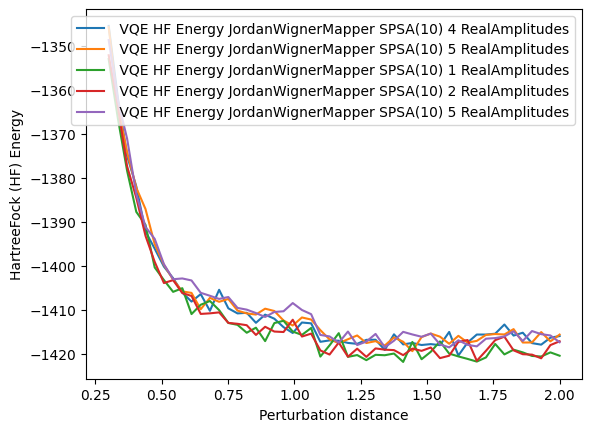

None

In [6]:
quantux_libraries.optuna_steps = []
quantux_libraries.optuna_energies = []
quantux_libraries.optuna_labels = []

study = optuna.create_study(pruner=optuna.pruners.PatientPruner(None, patience=9), direction='minimize')
early_stopping = EarlyStoppingCallback(early_stopping_rounds=10, direction='minimize')

quantux_libraries.dict_search_space = {
    'lst_mapper': ['JordanWignerMapper'],
    'optimizer': ['SPSA'],
    'min_reps': 1, 'max_reps': 5,
    'lst_initial_circuit': ['RealAmplitudes'],
}

study.optimize(objective, n_trials=5, callbacks=[early_stopping], timeout=3600)

for i, step in enumerate(quantux_libraries.optuna_steps):
    plt.plot(step, quantux_libraries.optuna_energies[i], label=quantux_libraries.optuna_labels[i])
plt.xlabel('Perturbation distance')
plt.ylabel('HartreeFock (HF) Energy')
plt.legend()
display(plt.show())    

## Running BOPES for Fe2_CO2 configuration

,molecule,charge,multiplicity,reference_energy,num_spin_orbitals,num_spatial_orbitals,num_particles,nuclear_repulsion_energy,num_alpha,num_beta,reduction_method,orbitals_removed,second_q_op,ansatz_chosen,initial_circuit_chosen,solver,optimizer,solution_method
0,['Fe' 'O' 'C' 'O'],2,1,-1421.025404094266,66,33,"(23, 23)",363.9425938236083,23,23,FreezeCore,"range(13, 30)","Fermionic Operator\nnumber spin orbitals=8, nu...",UCCSD,PauliTwoDesign,numpy_solver,COBYLA,gses


100%|██████████| 500/500 [1:35:27<00:00, 11.45s/it]


Molecule energy:-1425.926461437685 with atoms separated at [1.56973948] apart


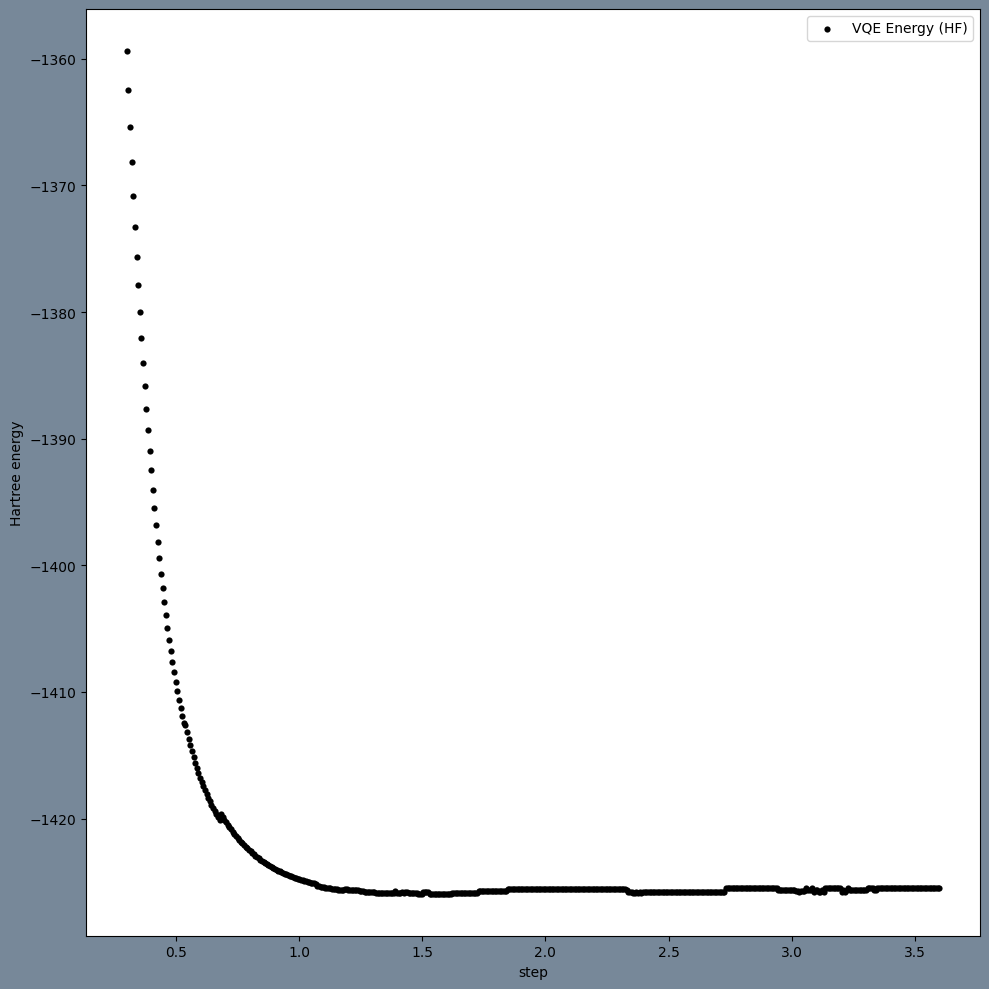

In [30]:
run_VQE_BOPES_Energies(molecule_name='Fe2_CO2',multiplicity=1,charge=2,masses=[56, 1, 16, 1], 
                       atom_pair = (0,1), freeze_remove=range(13,30), run_real = False, 
                       perturbation_steps = np.linspace(0.3, 3.6, 500), optimizer = 'COBYLA');

# 4. Deployment

## Exact energy vs VQE Noisless simulation

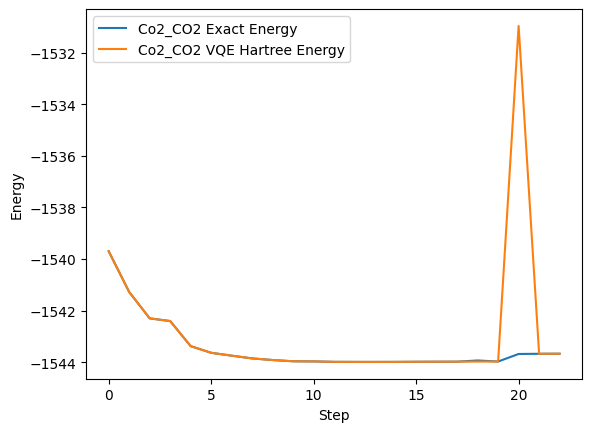

None

In [28]:
runVQEEnergies('Co2_CO2', 1,1,[59, 16, 12, 16], range(13,30), optimizer = 'COBYLA', 
               iterations = 1000, reps = 2, initial_circuit = 'RealAmplitudes')

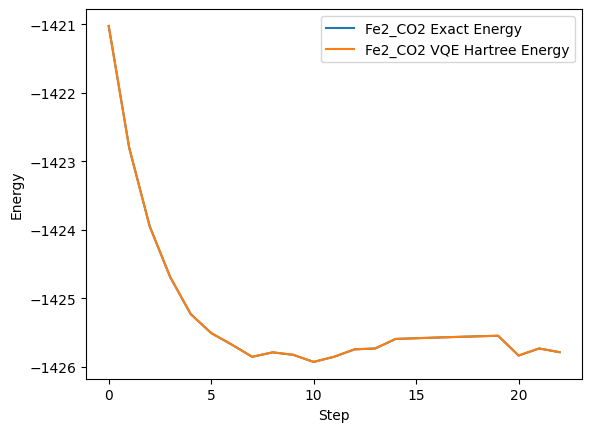

None

In [23]:
runVQEEnergies('Fe2_CO2', 1,2,[56, 16, 12, 16], range(13,30), optimizer = 'COBYLA', 
               iterations = 500, reps = 1, initial_circuit = 'RealAmplitudes')

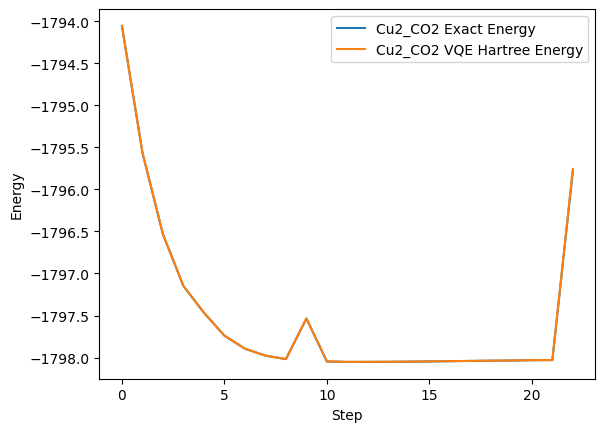

None

In [24]:
runVQEEnergies('Cu2_CO2', 1,1,[64, 16, 12, 16], range(13,30), optimizer = 'COBYLA', 
               iterations = 400, reps = 1, initial_circuit = 'RealAmplitudes')

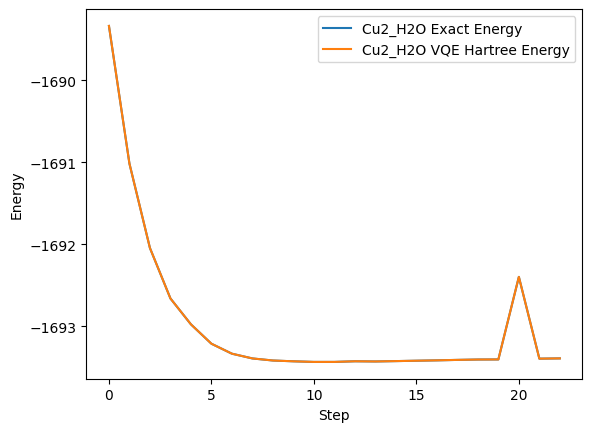

None

In [25]:
runVQEEnergies('Cu2_H2O', 1,1,[64, 1, 16, 1], range(13,30), optimizer = 'COBYLA', 
               iterations = 500, reps = 1, initial_circuit = 'RealAmplitudes')

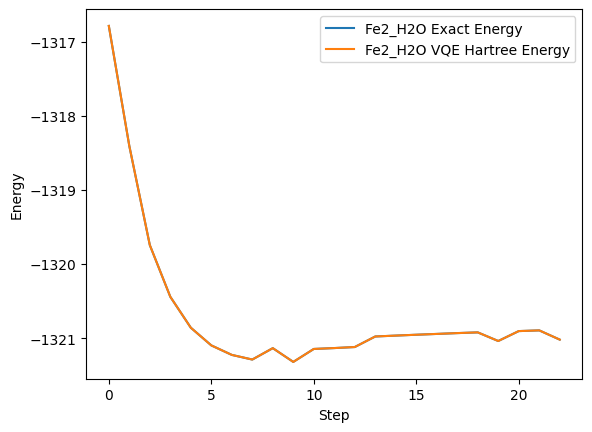

None

In [21]:
runVQEEnergies('Fe2_H2O', 1,2,[56, 1, 16, 1], range(13,30), optimizer = 'COBYLA', 
               iterations = 300, reps = 1, initial_circuit = 'RealAmplitudes')

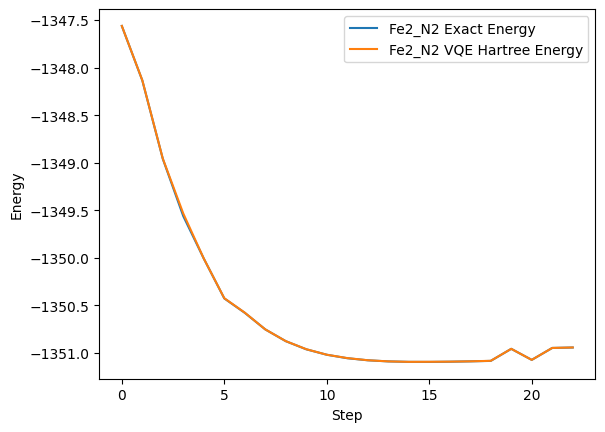

None

In [26]:
runVQEEnergies('Fe2_N2', 1,2,[56, 14, 14], range(16,34), optimizer = 'COBYLA', 
               iterations = 300, reps = 1, initial_circuit = 'RealAmplitudes')

## Ansatz comparison results

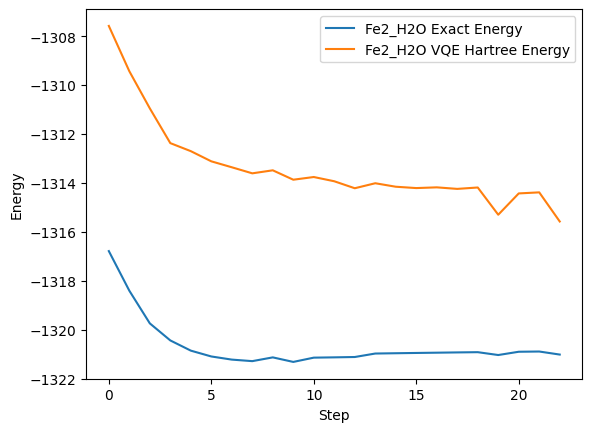

None

In [43]:
runVQEEnergies('Fe2_H2O', 1,2,[56, 1, 16, 1], range(13,30), optimizer = 'COBYLA', 
               iterations = 500, reps = 1, initial_circuit = 'TwoLocal')

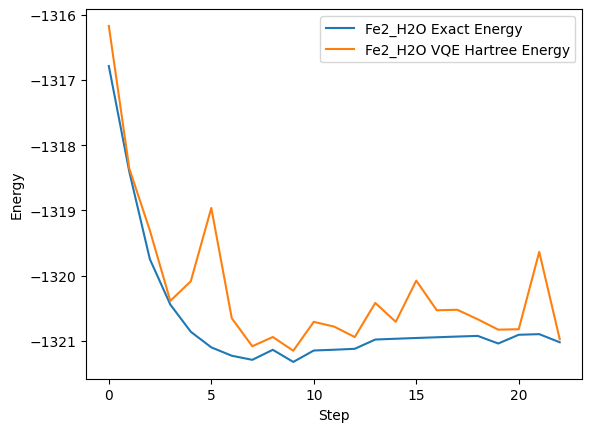

None

In [49]:
runVQEEnergies('Fe2_H2O', 1,2,[56, 1, 16, 1], range(13,30), optimizer = 'COBYLA', 
               iterations = 500, reps = 1, initial_circuit = 'EfficientSU2')

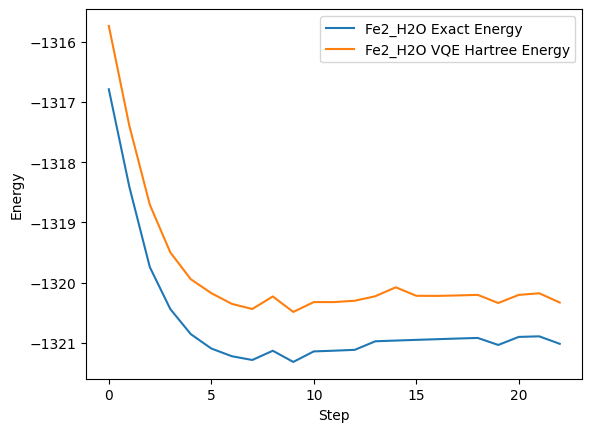

None

In [50]:
runVQEEnergies('Fe2_H2O', 1,2,[56, 1, 16, 1], range(13,30), optimizer = 'COBYLA', 
               iterations = 500, reps = 1, initial_circuit = 'PauliTwoDesign')

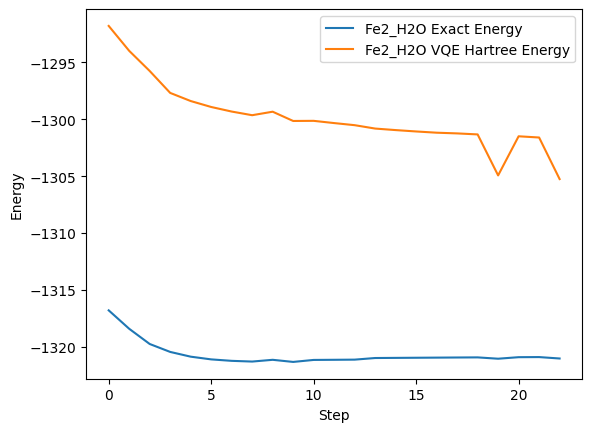

None

In [51]:
runVQEEnergies('Fe2_H2O', 1,2,[56, 1, 16, 1], range(13,30), optimizer = 'COBYLA', 
               iterations = 500, reps = 1, initial_circuit = 'ExcitationPreserving')

# Exact energy vs VQE Real quantum computer
With the small reduced problem size, the real QC run's energy is close to 0.

In [ ]:
runVQEEnergies('Fe2_H2O', 1,2,[56, 1, 16, 1], range(13,30), run_real = True, optimizer = 'COBYLA', iterations = 10, reps = 1, initial_circuit = 'RealAmplitudes')

# Exact energy vs Quantum Phase Estimation in noiseless simulation
By increasing the number of qubits the result's fidelity increases. Current report has 4 qubits.

In [ ]:
# ===
exact_energies = []
vqe_energies = []

steps = range(0,23)
for step in steps:
    #print("Starting step:", step, " VQE result:", vqe_energies)
    Co2_CO2 = get_coord(pth + r'/Co2_CO2.zip')
    mol, coords = getCoordinate(Co2_CO2, step, 4)

    gas_molecules = {
        'CoCO2': {'symbols': mol,
               'coords': coords,
               'multiplicity': 1,
               'charge': 1,
               'units': DistanceUnit.ANGSTROM,
               'masses': [59, 16, 12, 16],
               #'atom_pair': (1, 2), # not available after migration
               'fc_transformer': {
                   'fc_freeze_core': True, 
                   'fc_remove_orbitals': range(13,30),
                   },
    #           'as_transformer': {
    #               'as_num_electrons': 0,
    #               'as_num_spatial_orbitals': 2,
    #               'as_active_orbitals': [1, 1],
    #               }
               }
    }

    hyperparameters = {
        'CoCO2': {'reps': 2,
               'two_qubit_reduction': True,
               'z2symmetry_reduction': None,
               'backend': qasm_simulator, #qasm_simulator
               'ansatz': 'UCCSD',
               'initial_circuit': 'RealAmplitudes',
               'qpe_num_time_slices' : 1,
               'qpe_n_ancilliae': 3
              },

    }


    # ===
    molecule = gas_molecules['CoCO2']
    hyperparam = hyperparameters['CoCO2']
    optimizer = 'SPSA'
    # display_report = False
    display_dict = {}

    _, energy, display_df = get_construct_problem(input_value = gas_molecules['CoCO2'], hyperparam = hyperparameters['CoCO2'], 
                                                  input_type = 'molecule', display_report = False, reduced = 'FreezeCore', 
                                                  basis = 'sto3g', mapper_type = 'JordanWignerMapper', 
                                                  solver_type = 'numpy_solver', method = 'gses', optimizer = optimizer,seed = quantux_libraries._SEED)
    #print("Classical:", _, energy, display_df )
    exact_energies.append(energy)

    _, energy, display_df = get_construct_problem(input_value = gas_molecules['CoCO2'], hyperparam = hyperparameters['CoCO2'], 
                                                  input_type = 'molecule', display_report = False, reduced = 'FreezeCore', 
                                                  basis = 'sto3g', mapper_type = 'JordanWignerMapper', 
                                                  solver_type = 'numpy_solver', method = 'qpe', optimizer = optimizer,seed = quantux_libraries._SEED)
    #print("Quantum mechanic:", _, energy, display_df )
    vqe_energies.append(energy)


In [ ]:
molecule_name = "Co2_CO2"
plt.plot(steps, exact_energies, label=molecule_name + " Exact Energy")
plt.plot(steps, vqe_energies, label=molecule_name + " QPE Energy")
plt.xlabel('Step')
plt.ylabel('Energy')
plt.legend()
display(plt.show())

# Unittest for molecule energy from BOPES distances

In [7]:
# ===
gas_molecules = {
    'h2': {'symbols': ["H", "H"],
           'coords': [(0.0000, 0.0000, 0.0000),
                      (0.0000, 0.0000, 0.7414)],
           'multiplicity': 1,
           'charge': 0,
           'units': DistanceUnit.ANGSTROM,
           'masses': [1, 1],
           # 'atom_pair': (1, 2), # not available after migration
           'fc_transformer': {
               'fc_freeze_core': True, 
               'fc_remove_orbitals': None,
               },
           'as_transformer': {
               'as_num_electrons': 0,
               'as_num_spatial_orbitals': 2,
               'as_active_orbitals': [1, 1],
               }
           }
}

hyperparameters = {
    'h2': {'reps': 2,
           'two_qubit_reduction': True,
           'z2symmetry_reduction': 'auto',
           'perturbation_steps': np.linspace(0.5, 4.0, 250),
           'qpe_num_time_slices': 1,
           'qpe_n_ancilliae': 3,
           'atom_pair': (1, 2), # index start from 1
           'optimizer': 'SLSQP',
           'ansatz': 'UCCSD',
           'initial_circuit': 'PauliTwoDesign',
          },

}

solution_master = {
    'classical': ['numpy_solver', 'numpy_solver_with_filter'],
    'quantum': ['vqe_qnspsa', 'vqe_runtime', 'vqe_runtime_with_noise', 'vqe_ansatz', 'vqe_ansatz', 'vqe_initial_circuit']
}

# ===
input_value = gas_molecules['h2']
hyperparam = hyperparameters['h2']
input_type = 'molecule'
display_report = True
display_dict = {}
reduced = 'FreezeCore'
basis = 'sto3g'
mapper_type = 'JordanWignerMapper'
solver_type = 'numpy_solver'
method = 'gses'
optimizer = 'SPSA'
seed = quantux_libraries._SEED

In [8]:
_, energy, display_df = get_construct_problem(input_value, hyperparam, input_type, display_report, reduced, basis, mapper_type, solver_type, method, optimizer, seed)
display_df

,molecule,charge,multiplicity,reference_energy,num_spin_orbitals,num_spatial_orbitals,num_particles,nuclear_repulsion_energy,num_alpha,num_beta,reduction_method,orbitals_removed,second_q_op,ansatz_chosen,initial_circuit_chosen,solver,optimizer,solution_method
0,"['H', 'H']",0,1,-1.1166843870853405,4,2,"(1, 1)",0.7137539936876182,1,1,FreezeCore,None,"Fermionic Operator\nnumber spin orbitals=4, nu...",UCCSD,PauliTwoDesign,numpy_solver,SPSA,gses


100%|██████████| 250/250 [04:45<00:00,  1.14s/it]


Molecule energy:-1.1372927050670416 with atoms separated at [0.73092369] apart


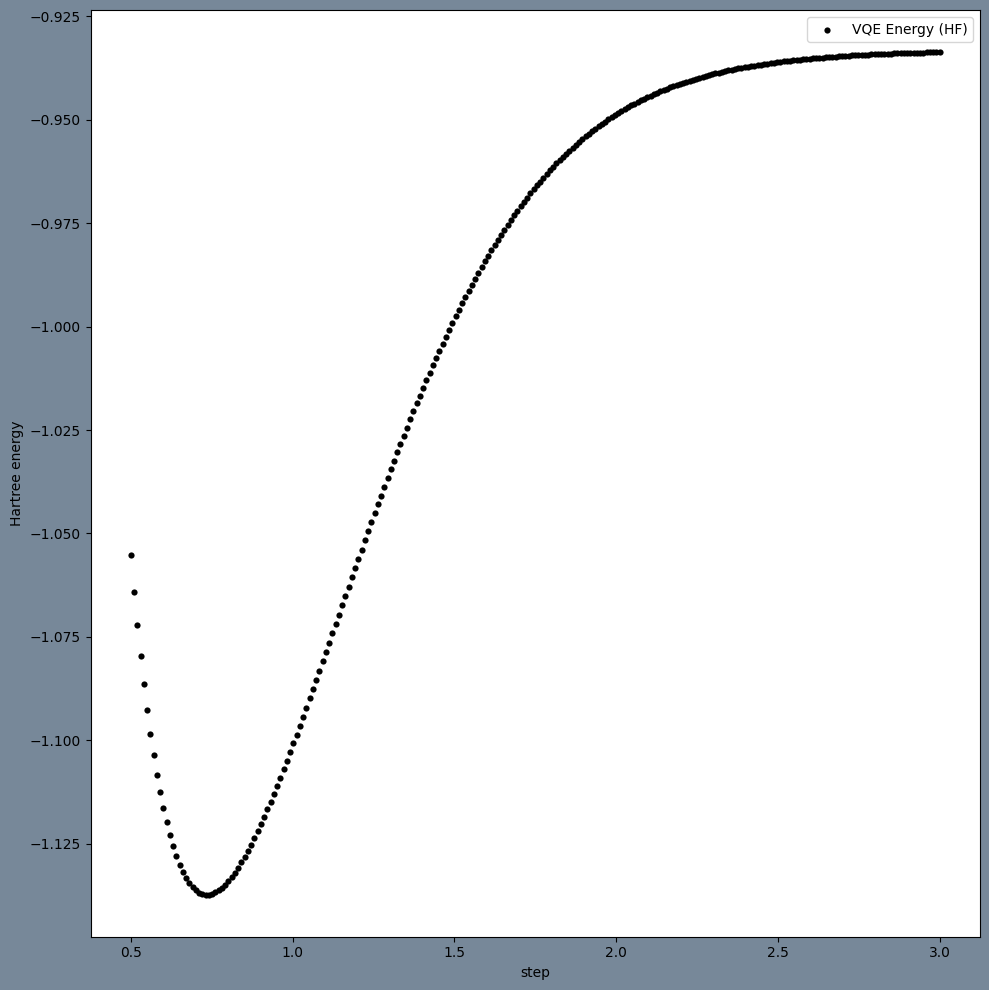

In [10]:
perturb_steps, energy_lst = get_a_molecule_bopes(input_value = gas_molecules['h2'], hyperparam = hyperparameters['h2'], input_type = 'molecule',
                                               reduced = 'FreezeCore', basis = 'sto3g', mapper_type = 'JordanWignerMapper', solver_type = 'numpy_solver', method = 'gses', 
                                               perturbation_steps = np.linspace(0.5, 3.0, 250), optimizer = optimizer, display_report = True, seed = quantux_libraries._SEED)

# Additional Molecular data

In [ ]:
gas_molecules = {
    'h2': {'symbols': ["H", "H"],
           'coords': [(0.0000, 0.0000, 0.0000),
                      (0.0000, 0.0000, 0.7414)],
           'multiplicity': 1,
           'charge': 0,
           'units': DistanceUnit.ANGSTROM,
           'masses': [1, 1],
           'atom_pair': (1, 2),
           'fc_transformer': {
               'fc_freeze_core': True, 
               'fc_remove_orbitals': None,
               },
           'as_transformer': {
               'as_num_electrons': 0,
               'as_num_spatial_orbitals': 2,
               'as_active_orbitals': [1, 1],
               }
           },
    'n2': {'symbols': ["N", "N"],
           'coords': [(0.0000, 0.0000, 0.5488), 
                      (0.0000, 0.0000, -0.5488)],
           'multiplicity': 4,
           'charge': 0,
           'units': DistanceUnit.ANGSTROM,
           'masses': [7, 7],
           'atom_pair': (1, 2),
           'fc_transformer': {
               'fc_freeze_core': True, 
               'fc_remove_orbitals': None,
               },
           'as_transformer': {
               'as_num_electrons': 0,
               'as_num_spatial_orbitals': 2,
               'as_active_orbitals': [1, 1],
               }
           
           
           },
    'co2': {'symbols': ["C", "O", "O"],
            'coords': [(0.0000, 0.0000, 0.0000),
                       (0.0000, 0.0000, 1.1621),
                       (0.0000, 0.0000, -1.1621)],
            'multiplicity': 2,
            'charge': 0,
            'units': DistanceUnit.ANGSTROM,
            'masses': [12, 8, 8],
            'atom_pair': (1, 2)
           },
    'h2o': {'symbols': ["O", "H", "H"],
            'coords': [(0.0000, 0.0000, 0.1173),
                       (0.0000, 0.7572, -0.4692),
                       (0.0000, -0.7572, -0.4692)],
            'multiplicity': 1,
            'charge': 0,
            'units': DistanceUnit.ANGSTROM,
            'masses': [12, 8, 8],
            'atom_pair': (1, 2)
           },
    'so2': {'symbols': ["S", "O", "O"],
            'coords': [(0.0000, 0.0000, 0.0000),
                       (0.0000, 1.2371, 0.7215),
                       (0.0000, -1.2371, 0.7215)],
            'multiplicity': 1,
            'charge': 0,
            'units': DistanceUnit.ANGSTROM,
            'masses': [12, 8, 8],
            'atom_pair': (1, 2)
           },
    'no2': {'symbols': ["N", "O", "O"],
            'coords': [(0.0000, 0.0000, 0.0000),
                       (0.0000, 1.0989, 0.4653),
                       (0.0000, -1.0989, 0.4653)],
            'multiplicity': 2,
            'charge': 0,
            'units': DistanceUnit.ANGSTROM,
            'masses': [12, 8, 8],
            'atom_pair': (1, 2)
           },
    'n2o': {'symbols': ["N", "N", "O"],
            'coords': [(0.0000, 0.0000, -1.1998),
                       (0.0000, 0.7572, -0.0716),
                       (0.0000, -0.7572, 1.126)],
            'multiplicity': 1,
            'charge': 0,
            'units': DistanceUnit.ANGSTROM,
            'masses': [12, 8, 8],
            'atom_pair': (1, 2)
           },
    'ch4': {'symbols': ["C", "H", "H", "H", "H"],
            'coords': [(0.0000, 0.0000, 0.0000), 
                       (0.6276, 0.6276, 0.6276),
                       (0.6276, -0.6276, -0.6276),
                       (-0.6276, 0.6276, -0.6276),
                       (0.6276, -0.6276, 0.6276)],
            'multiplicity': 1,
            'charge': 0,
            'units': DistanceUnit.ANGSTROM,
            'masses': [12, 1, 1, 1, 1],
            'atom_pair': (1, 4)
           },
    

}

# Not updated
# Spin multiplicity check SO2, N2O, CH4


# References and credits

## Team: Quantux

- https://github.com/buttercutter/quantum-climate-challenge-2023


## References:
### Python functions
- https://dev.to/kcdchennai/python-decorator-to-measure-execution-time-54hk

### Machine Learning modules
- https://towardsdatascience.com/state-of-the-art-machine-learning-hyperparameter-optimization-with-optuna-a315d8564de1

### Qiskit with latest post-migration modules and functions
- https://github.com/PacktPublishing/Quantum-Chemistry-and-Computing-for-the-Curious/blob/main/Chapter_05_Variational_Quantum_Eigensolver_.VQE._algorithm_V2.ipynb

- https://qiskit.org/documentation/nature/_modules/qiskit_nature/second_q/
- https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
- https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
- https://qiskit.org/documentation/nature/tutorials/05_problem_transformers.html

### Qiskit realtime IBQM providers
- https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.AccountProvider.html
- https://qiskit.org/documentation/partners/qiskit_ibm_provider/tutorials/Migration_Guide_from_qiskit-ibmq-provider.html
- https://quantumcomputing.stackexchange.com/questions/17375/is-there-any-way-to-obtain-the-number-of-qubits-of-a-given-backend-in-qiskit
- https://qiskit.org/documentation/apidoc/providers_fake_provider.html
- https://qiskit.org/documentation/tutorials/algorithms/02_vqe_advanced_options.html
- https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials/Error-Suppression-and-Error-Mitigation.html
- https://qiskit.org/documentation/tutorials/algorithms/03_vqe_simulation_with_noise.html

- https://qiskit.org/documentation/partners/qiskit_ibm_runtime/how_to/error-mitigation.html
- https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.DynamicalDecoupling.html

- Options - resilience level: No error mitigation
- Options - optimization level: 

### Distance: dist on metal ion + gas molecule
